In [146]:
import requests
import pandas as pd
import numpy as np
import soilgrids

In [147]:
def get_soil_data (lat:int, lon:int):
    url=f"https://rest.isric.org/soilgrids/v2.0/properties/query?lon={lon}&lat={lat}&property=bdod&property=cec&property=cfvo&property=clay&property=nitrogen&property=ocd&property=ocs&property=phh2o&property=sand&property=silt&property=soc&depth=0-5cm&depth=0-30cm&depth=5-15cm&depth=15-30cm&depth=30-60cm&depth=60-100cm&depth=100-200cm"    
    response = requests.get(url)
    return response.json()
    

In [148]:
def process_soil_dictionary (soil:dict): 
    resp=soil['properties']['layers']
    result={}
    for feature in resp:
        for depth_range in feature['depths']:
            result [f"{feature['name']}_{depth_range['range']['top_depth']}_{depth_range['range']['bottom_depth']}"]=depth_range.get('values').get('mean',np.nan)
    result=pd.DataFrame(result, index=[0])
    return result
    


In [149]:
def return_soil_features (lat, lon):
    return process_soil_dictionary(get_soil_data(lat,lon))

In [150]:
return_soil_features (47.2856, 13.6531)

,bdod_0_5,bdod_5_15,bdod_15_30,bdod_30_60,bdod_60_100,bdod_100_200,cec_0_5,cec_5_15,cec_15_30,cec_30_60,...,silt_15_30,silt_30_60,silt_60_100,silt_100_200,soc_0_5,soc_5_15,soc_15_30,soc_30_60,soc_60_100,soc_100_200
0,88,96,101,119,128,132,466,300,277,212,...,341,329,337,336,980,776,469,303,237,233


In [37]:
return_soil_features (-9, -72)

,bdod_0_5,bdod_5_15,bdod_15_30,bdod_30_60,bdod_60_100,bdod_100_200,cec_0_5,cec_5_15,cec_15_30,cec_30_60,...,silt_15_30,silt_30_60,silt_60_100,silt_100_200,soc_0_5,soc_5_15,soc_15_30,soc_30_60,soc_60_100,soc_100_200
0,116,124,129,138,139,141,152,117,113,118,...,422,364,355,375,272,150,89,56,38,34


In [4]:
get_soil_data (-9, -72)

{'type': 'Feature',
 'geometry': {'type': 'Point', 'coordinates': [-72.0, -9.0]},
 'properties': {'layers': [{'name': 'bdod',
    'unit_measure': {'d_factor': 100,
     'mapped_units': 'cg/cm³',
     'target_units': 'kg/dm³',
     'uncertainty_unit': ''},
    'depths': [{'range': {'top_depth': 0,
       'bottom_depth': 5,
       'unit_depth': 'cm'},
      'label': '0-5cm',
      'values': {'Q0.05': 78,
       'Q0.5': 118,
       'Q0.95': 151,
       'mean': 116,
       'uncertainty': 6}},
     {'range': {'top_depth': 5, 'bottom_depth': 15, 'unit_depth': 'cm'},
      'label': '5-15cm',
      'values': {'Q0.05': 82,
       'Q0.5': 123,
       'Q0.95': 157,
       'mean': 124,
       'uncertainty': 6}},
     {'range': {'top_depth': 15, 'bottom_depth': 30, 'unit_depth': 'cm'},
      'label': '15-30cm',
      'values': {'Q0.05': 83,
       'Q0.5': 131,
       'Q0.95': 163,
       'mean': 129,
       'uncertainty': 6}},
     {'range': {'top_depth': 30, 'bottom_depth': 60, 'unit_depth': 'cm'}

In [9]:
import matplotlib.pyplot as plt
from soilgrids import SoilGrids

# get data from SoilGrids
soil_grids = SoilGrids()
data = soil_grids.get_coverage_data(service_id='phh2o', coverage_id=('phh2o_0-5cm_mean', 'phh2o_5-15cm_mean'),
                                        width=720, height=360, west=-179.998360809347, south=-55.9773009202418, east=179.994461880094, north=82.7192840534453,
                                       crs='urn:ogc:def:crs:EPSG::4326',output='test.tif')

# show metadata
for key, value in soil_grids.metadata.items():
    print('{}: {}'.format(key,value))


# plot data
data.plot(figsize=(9,5))
plt.title('Mean pH between 0 and 5 cm soil depth in Senegal')


ValueError: Please provide a coverage id from the following options: 
phh2o_0-5cm_Q0.05
phh2o_0-5cm_Q0.5
phh2o_0-5cm_Q0.95
phh2o_0-5cm_mean
phh2o_0-5cm_uncertainty
phh2o_5-15cm_Q0.5
phh2o_5-15cm_Q0.05
phh2o_5-15cm_Q0.95
phh2o_5-15cm_mean
phh2o_5-15cm_uncertainty
phh2o_15-30cm_Q0.05
phh2o_15-30cm_Q0.5
phh2o_15-30cm_Q0.95
phh2o_15-30cm_mean
phh2o_15-30cm_uncertainty
phh2o_30-60cm_Q0.05
phh2o_30-60cm_Q0.5
phh2o_30-60cm_Q0.95
phh2o_30-60cm_mean
phh2o_30-60cm_uncertainty
phh2o_60-100cm_Q0.5
phh2o_60-100cm_Q0.05
phh2o_60-100cm_Q0.95
phh2o_60-100cm_mean
phh2o_60-100cm_uncertainty
phh2o_100-200cm_Q0.05
phh2o_100-200cm_Q0.5
phh2o_100-200cm_Q0.95
phh2o_100-200cm_mean
phh2o_100-200cm_uncertainty

In [66]:
import numpy as np
unique, counts = np.unique(data.values[0], return_counts=True)
print(np.asarray((unique, counts)).T)

[[     0 186132]
 [    36      1]
 [    37      3]
 [    38     18]
 [    39     88]
 [    40    210]
 [    41    241]
 [    42    212]
 [    43    254]
 [    44    379]
 [    45    521]
 [    46    899]
 [    47   1166]
 [    48   1240]
 [    49   1427]
 [    50   1635]
 [    51   2093]
 [    52   2478]
 [    53   2700]
 [    54   2863]
 [    55   2765]
 [    56   2723]
 [    57   2554]
 [    58   2575]
 [    59   2560]
 [    60   2512]
 [    61   2561]
 [    62   2335]
 [    63   2039]
 [    64   1786]
 [    65   1553]
 [    66   1419]
 [    67   1278]
 [    68   1337]
 [    69   1321]
 [    70   1296]
 [    71   1256]
 [    72   1230]
 [    73   1267]
 [    74   1243]
 [    75   1317]
 [    76   1537]
 [    77   1846]
 [    78   2067]
 [    79   2004]
 [    80   2137]
 [    81   2189]
 [    82   1969]
 [    83   1145]
 [    84    475]
 [    85    147]
 [    86     86]
 [    87     49]
 [    88     33]
 [    89     11]
 [    90     11]
 [    91      3]
 [    92      1]
 [    93      

In [8]:
soil_grids.get_coverage_info(service_id='phh2o', coverage_id='phh2o_0-5cm_mean')

Supported CRS: 
urn:ogc:def:crs:EPSG::152160
urn:ogc:def:crs:EPSG::4326
urn:ogc:def:crs:EPSG::3857
urn:ogc:def:crs:EPSG::54009
urn:ogc:def:crs:EPSG::54012
urn:ogc:def:crs:EPSG::152160

Coverage Bounding Box: 
EPSG:4326
(-179.998360809347, -55.9773009202418, 179.994461880094, 82.7192840534453)
EPSG:152160
(-19949750.0, -6147500.0, 19861750.0, 8361000.0)



In [90]:
data.coords['x']

<xarray.DataArray 'x' (x: 720)>
array([-179.748366, -179.248376, -178.748386, ...,  178.744487,  179.244477,
        179.744467])
Coordinates:
  * x            (x) float64 -179.7 -179.2 -178.7 -178.2 ... 178.7 179.2 179.7
    spatial_ref  int64 0

In [7]:
soil_grids.get_coverage_list(service_id='cec')


"cec" map service includes 30 coverages(maps)

cec_0-5cm_Q0.05
cec_0-5cm_Q0.5
cec_0-5cm_Q0.95
cec_0-5cm_mean
cec_0-5cm_uncertainty
cec_5-15cm_Q0.05
cec_5-15cm_Q0.5
cec_5-15cm_Q0.95
cec_5-15cm_mean
cec_5-15cm_uncertainty
cec_15-30cm_Q0.5
cec_15-30cm_Q0.05
cec_15-30cm_Q0.95
cec_15-30cm_mean
cec_15-30cm_uncertainty
cec_30-60cm_Q0.05
cec_30-60cm_Q0.5
cec_30-60cm_Q0.95
cec_30-60cm_mean
cec_30-60cm_uncertainty
cec_60-100cm_Q0.5
cec_60-100cm_Q0.05
cec_60-100cm_Q0.95
cec_60-100cm_mean
cec_60-100cm_uncertainty
cec_100-200cm_Q0.5
cec_100-200cm_Q0.05
cec_100-200cm_Q0.95
cec_100-200cm_mean
cec_100-200cm_uncertainty


In [30]:
import time

In [51]:
depths=['0-5cm_mean','5-15cm_mean', '15-30cm_mean', '30-60cm_mean', '60-100cm_mean', '100-200cm_mean']
variables=['bdod', 'cec', 'cfvo','clay','nitrogen','phh2o','sand','silt','soc','ocd']

df=[]
for i in variables:
    for j in depths:
        soil_grids = SoilGrids()
        data=soil_grids.get_coverage_data(service_id=i, coverage_id=f"{i}_{j}",
                                            width=720, height=360, west=-180, south=-90, east=180, north=90,
                                           crs='urn:ogc:def:crs:EPSG::4326',output='test.tif')
        for key, value in soil_grids.metadata.items():
            print('{}: {}'.format(key,value))
        print(f"!!!!!!{i}_{j}")
        time.sleep(4)
        df.append(data.to_numpy())

variable_name: Bulk density
variable_units: cg/cm3
service_url: https://maps.isric.org/mapserv?map=/map/bdod.map
service_id: bdod
coverage_id: bdod_0-5cm_mean
crs: urn:ogc:def:crs:EPSG::4326
bounding_box: (-180, -90, 180, 90)
grid_res: [0.5, 0.5]
!!!!!!bdod_0-5cm_mean
variable_name: Bulk density
variable_units: cg/cm3
service_url: https://maps.isric.org/mapserv?map=/map/bdod.map
service_id: bdod
coverage_id: bdod_5-15cm_mean
crs: urn:ogc:def:crs:EPSG::4326
bounding_box: (-180, -90, 180, 90)
grid_res: [0.5, 0.5]
!!!!!!bdod_5-15cm_mean
variable_name: Bulk density
variable_units: cg/cm3
service_url: https://maps.isric.org/mapserv?map=/map/bdod.map
service_id: bdod
coverage_id: bdod_15-30cm_mean
crs: urn:ogc:def:crs:EPSG::4326
bounding_box: (-180, -90, 180, 90)
grid_res: [0.5, 0.5]
!!!!!!bdod_15-30cm_mean
variable_name: Bulk density
variable_units: cg/cm3
service_url: https://maps.isric.org/mapserv?map=/map/bdod.map
service_id: bdod
coverage_id: bdod_30-60cm_mean
crs: urn:ogc:def:crs:EPSG:

variable_name: Nitrogen
variable_units: cg/kg
service_url: https://maps.isric.org/mapserv?map=/map/nitrogen.map
service_id: nitrogen
coverage_id: nitrogen_100-200cm_mean
crs: urn:ogc:def:crs:EPSG::4326
bounding_box: (-180, -90, 180, 90)
grid_res: [0.5, 0.5]
!!!!!!nitrogen_100-200cm_mean
variable_name: Soil pH in H2O
variable_units: pH*10
service_url: https://maps.isric.org/mapserv?map=/map/phh2o.map
service_id: phh2o
coverage_id: phh2o_0-5cm_mean
crs: urn:ogc:def:crs:EPSG::4326
bounding_box: (-180, -90, 180, 90)
grid_res: [0.5, 0.5]
!!!!!!phh2o_0-5cm_mean
variable_name: Soil pH in H2O
variable_units: pH*10
service_url: https://maps.isric.org/mapserv?map=/map/phh2o.map
service_id: phh2o
coverage_id: phh2o_5-15cm_mean
crs: urn:ogc:def:crs:EPSG::4326
bounding_box: (-180, -90, 180, 90)
grid_res: [0.5, 0.5]
!!!!!!phh2o_5-15cm_mean
variable_name: Soil pH in H2O
variable_units: pH*10
service_url: https://maps.isric.org/mapserv?map=/map/phh2o.map
service_id: phh2o
coverage_id: phh2o_15-30cm_me

variable_name: Organic carbon densities
variable_units: hg/dm3
service_url: https://maps.isric.org/mapserv?map=/map/ocd.map
service_id: ocd
coverage_id: ocd_100-200cm_mean
crs: urn:ogc:def:crs:EPSG::4326
bounding_box: (-180, -90, 180, 90)
grid_res: [0.5, 0.5]
!!!!!!ocd_100-200cm_mean


In [55]:
df[0].shape

(1, 360, 720)

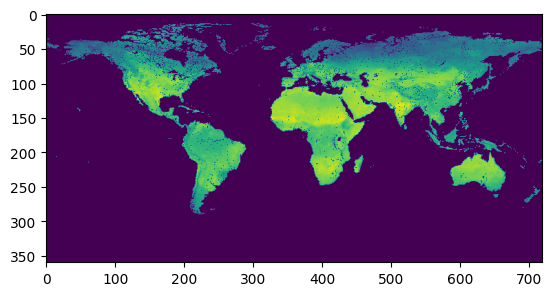

In [52]:

plt.imshow(df[0][0,:,:])


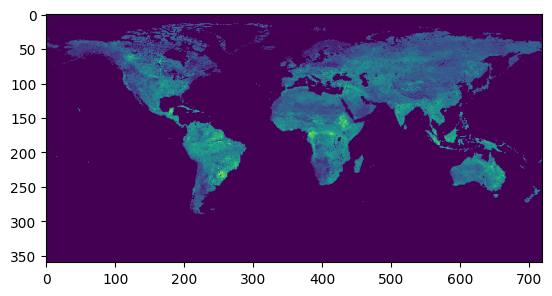

In [53]:
plt.imshow(df[22][0,:,:])

In [ ]:
soil_grids = SoilGrids()
        data = soil_grids.get_coverage_data(service_id='ocs', coverage_id=f"{i}_0-30cm_mean",
                                            width=720, height=360, west=-180, south=-90, east=180, north=90,
                                           crs='urn:ogc:def:crs:EPSG::4326',output='test.tif')
        df.append(data)

In [16]:
for i in variables:
    soil_grids.get_coverage_list(service_id=i)

"bdod" map service includes 30 coverages(maps)

bdod_0-5cm_Q0.5
bdod_0-5cm_Q0.05
bdod_0-5cm_Q0.95
bdod_0-5cm_mean
bdod_0-5cm_uncertainty
bdod_5-15cm_Q0.5
bdod_5-15cm_Q0.05
bdod_5-15cm_Q0.95
bdod_5-15cm_mean
bdod_5-15cm_uncertainty
bdod_15-30cm_Q0.5
bdod_15-30cm_Q0.05
bdod_15-30cm_Q0.95
bdod_15-30cm_mean
bdod_15-30cm_uncertainty
bdod_30-60cm_Q0.05
bdod_30-60cm_Q0.5
bdod_30-60cm_Q0.95
bdod_30-60cm_mean
bdod_30-60cm_uncertainty
bdod_60-100cm_Q0.05
bdod_60-100cm_Q0.5
bdod_60-100cm_Q0.95
bdod_60-100cm_mean
bdod_60-100cm_uncertainty
bdod_100-200cm_Q0.05
bdod_100-200cm_Q0.5
bdod_100-200cm_Q0.95
bdod_100-200cm_mean
bdod_100-200cm_uncertainty
"cec" map service includes 30 coverages(maps)

cec_0-5cm_Q0.05
cec_0-5cm_Q0.5
cec_0-5cm_Q0.95
cec_0-5cm_mean
cec_0-5cm_uncertainty
cec_5-15cm_Q0.05
cec_5-15cm_Q0.5
cec_5-15cm_Q0.95
cec_5-15cm_mean
cec_5-15cm_uncertainty
cec_15-30cm_Q0.5
cec_15-30cm_Q0.05
cec_15-30cm_Q0.95
cec_15-30cm_mean
cec_15-30cm_uncertainty
cec_30-60cm_Q0.05
cec_30-60cm_Q0.5
cec_30-60

In [57]:
import numpy as np

In [64]:
c=np.array( df)
len(c)


array([[[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]],


       [[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]],


       [[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]],


       ...,


       [[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]],


       [[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 

In [130]:
values, counts=np.unique(c[0],return_counts=True)
counts

array([203102,      1,      1,      2,      1,      1,      2,      8,
            7,     13,     11,     28,     16,     15,     22,     31,
           44,     54,     50,     58,     57,     77,     91,     99,
          116,    163,    170,    189,    221,    219,    254,    287,
          279,    286,    298,    344,    357,    337,    360,    397,
          396,    404,    421,    411,    391,    458,    459,    414,
          449,    413,    414,    397,    400,    373,    329,    329,
          322,    322,    291,    356,    312,    315,    375,    321,
          355,    322,    356,    362,    390,    371,    379,    405,
          355,    360,    400,    413,    409,    440,    457,    469,
          502,    521,    495,    567,    598,    620,    631,    658,
          680,    628,    586,    654,    627,    616,    619,    660,
          631,    600,    674,    677,    722,    778,    740,    818,
          834,    858,    859,    939,   1009,   1007,   1066,   1082,
      

In [120]:
d=c.reshape(60,360,720)



In [123]:
np.unique(d[40], return_counts=True)

(array([  0,   6,   9,  13,  15,  17,  18,  21,  22,  24,  26,  28,  29,
         30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
         43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
         56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
         69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
         82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
         95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
        108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
        121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
        134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
        147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
        160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
        173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185,
        186, 187, 188, 189, 190, 191, 192, 193, 194

In [78]:
np.save('soil_data.npy', d)

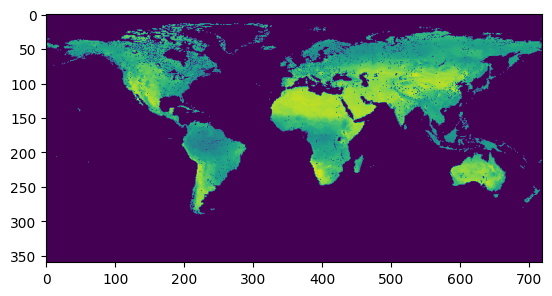

In [81]:
plt.imshow(d[30][:,:])

In [180]:
def get_soil_dataa(lat, lon):
    u=np.load('../raw_data/soil_data.npy')
    c_lat = int(round(np.interp(lat, [-90, 90], [0, 360])))  # check order of values here
    c_lon = int(round(np.interp(lon, [-180, 180], [0, 720])))
    w=[]
    for i in range(u.shape[0]):
        h=u[i, c_lat, c_lon]
        if h==0: 
            w.append(np.nan)
        else:
            w.append(h)
            
    return w
        
# get_soil_data(13.6531, 47.2856)


In [87]:
d.shape

(60, 360, 720)

In [159]:
u[7, 275, 387]

0

In [153]:
    c_lat = int(round(np.interp(47.2856, [-90, 90], [0, 360])))  # check order of values here
    c_lon = int(round(np.interp(13.6531, [-180, 180], [0, 720])))

In [154]:
c_lat

275

In [155]:
c_lon

387

In [137]:
values, counts=np.unique(u[40],return_counts=True)

In [138]:
counts=list(counts)
leng=len(counts)
sum=0
for i in range(1,leng):
    sum=sum+counts[i]
sum

56224

In [139]:
counts=list(counts)
leng=len(counts)
tot=0
for i in range(leng):
    tot=tot+counts[i]
tot

259200

In [144]:
(counts[0]+56224)/56224

4.610130904951622

In [126]:
list(counts)

[202976,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 3,
 4,
 3,
 3,
 2,
 2,
 2,
 2,
 1,
 3,
 2,
 4,
 3,
 4,
 5,
 1,
 3,
 10,
 5,
 4,
 5,
 3,
 5,
 4,
 5,
 4,
 5,
 4,
 6,
 7,
 4,
 3,
 6,
 7,
 3,
 4,
 5,
 3,
 3,
 5,
 4,
 2,
 6,
 6,
 2,
 6,
 6,
 8,
 2,
 3,
 5,
 2,
 5,
 8,
 3,
 4,
 4,
 6,
 4,
 10,
 5,
 10,
 11,
 5,
 6,
 4,
 10,
 8,
 13,
 8,
 5,
 16,
 7,
 11,
 8,
 12,
 8,
 13,
 8,
 7,
 9,
 15,
 12,
 7,
 9,
 14,
 12,
 8,
 9,
 8,
 10,
 13,
 10,
 15,
 7,
 11,
 14,
 18,
 12,
 13,
 19,
 7,
 14,
 19,
 19,
 12,
 11,
 10,
 11,
 16,
 19,
 16,
 17,
 14,
 14,
 20,
 18,
 20,
 25,
 18,
 16,
 19,
 18,
 17,
 17,
 22,
 22,
 16,
 19,
 24,
 27,
 30,
 25,
 23,
 27,
 27,
 24,
 19,
 27,
 25,
 26,
 27,
 23,
 28,
 20,
 30,
 30,
 29,
 34,
 23,
 28,
 34,
 25,
 32,
 23,
 27,
 36,
 28,
 22,
 33,
 34,
 34,
 31,
 30,
 27,
 27,
 32,
 33,
 34,
 30,
 37,
 34,
 37,
 30,
 49,
 33,
 37,
 39,
 43,
 36,
 38,
 36,
 35,
 45,
 44,
 42,
 39,
 51,
 49,
 41,
 39,
 51,
 41,
 52,
 45,
 39,
 48,
 43,
 47,
 55,
 55,
 57,
 59,
 47,
 35,


In [134]:
values, b=np.unique(df[22][0],return_counts=True)

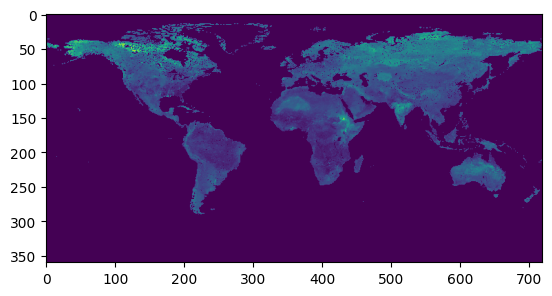

In [160]:
plt.imshow(u[7])


In [161]:
final=pd.read_csv('../raw_data/data_inkl_bioclim.csv')


,Unnamed: 0,gbifID,datasetKey,kingdom,phylum,class,order,family,genus,species,...,b10,b11,b12,b13,b14,b15,b16,b17,b18,b19
0,0,1807713417,2f676abc-4503-489e-8f0c-fcb6e1bc554b,Animalia,Arthropoda,Insecta,Coleoptera,Curculionidae,Andranthobius,Andranthobius setirostris,...,2.4,90.267967,27.1,27.1,1885.800049,440.700012,51.400002,51.400002,25.966667,27.1
1,1,1807713566,2f676abc-4503-489e-8f0c-fcb6e1bc554b,Animalia,Arthropoda,Insecta,Coleoptera,Curculionidae,Andranthobius,Andranthobius setirostris,...,2.4,90.267967,27.1,27.1,1885.800049,440.700012,51.400002,51.400002,25.966667,27.1
2,2,1807713573,2f676abc-4503-489e-8f0c-fcb6e1bc554b,Animalia,Arthropoda,Insecta,Coleoptera,Curculionidae,Andranthobius,Andranthobius setirostris,...,2.4,90.267967,27.1,27.1,1885.800049,440.700012,51.400002,51.400002,25.966667,27.1
3,3,1807713712,2f676abc-4503-489e-8f0c-fcb6e1bc554b,Animalia,Arthropoda,Insecta,Coleoptera,Curculionidae,Andranthobius,Andranthobius setirostris,...,2.4,90.267967,27.1,27.1,1885.800049,440.700012,51.400002,51.400002,25.966667,27.1
4,4,1807713469,2f676abc-4503-489e-8f0c-fcb6e1bc554b,Animalia,Arthropoda,Insecta,Coleoptera,Curculionidae,Andranthobius,Andranthobius setirostris,...,2.4,90.267967,27.1,27.1,1885.800049,440.700012,51.400002,51.400002,25.966667,27.1


In [162]:
final.shape

(166163, 37)

In [163]:
final.columns

Index(['Unnamed: 0', 'gbifID', 'datasetKey', 'kingdom', 'phylum', 'class',
       'order', 'family', 'genus', 'species', 'scientificName',
       'verbatimScientificName', 'countryCode', 'locality', 'stateProvince',
       'decimalLatitude', 'decimalLongitude', 'year', 'b1', 'b2', 'b3', 'b4',
       'b5', 'b6', 'b7', 'b8', 'b9', 'b10', 'b11', 'b12', 'b13', 'b14', 'b15',
       'b16', 'b17', 'b18', 'b19'],
      dtype='object')

In [181]:
k=[]
for i, v in final.iterrows():
    lat=v['decimalLatitude']
    lon=v['decimalLongitude']
    k.append(get_soil_dataa(lat, lon))
k    

IndexError: index 720 is out of bounds for axis 2 with size 720

In [183]:
len(k)

127313

In [173]:
depths2=['0-5','5-15', '15-30', '30-60', '60-100', '100-200']
variables2=['bdod', 'cec', 'cfvo','clay','nitrogen','phh2o','sand','silt','soc','ocd']

labels=[]
for i in variables2:
    for j in depths2:
        labels.append(f"{i}_{j}")
labels

['bdod_0-5',
 'bdod_5-15',
 'bdod_15-30',
 'bdod_30-60',
 'bdod_60-100',
 'bdod_100-200',
 'cec_0-5',
 'cec_5-15',
 'cec_15-30',
 'cec_30-60',
 'cec_60-100',
 'cec_100-200',
 'cfvo_0-5',
 'cfvo_5-15',
 'cfvo_15-30',
 'cfvo_30-60',
 'cfvo_60-100',
 'cfvo_100-200',
 'clay_0-5',
 'clay_5-15',
 'clay_15-30',
 'clay_30-60',
 'clay_60-100',
 'clay_100-200',
 'nitrogen_0-5',
 'nitrogen_5-15',
 'nitrogen_15-30',
 'nitrogen_30-60',
 'nitrogen_60-100',
 'nitrogen_100-200',
 'phh2o_0-5',
 'phh2o_5-15',
 'phh2o_15-30',
 'phh2o_30-60',
 'phh2o_60-100',
 'phh2o_100-200',
 'sand_0-5',
 'sand_5-15',
 'sand_15-30',
 'sand_30-60',
 'sand_60-100',
 'sand_100-200',
 'silt_0-5',
 'silt_5-15',
 'silt_15-30',
 'silt_30-60',
 'silt_60-100',
 'silt_100-200',
 'soc_0-5',
 'soc_5-15',
 'soc_15-30',
 'soc_30-60',
 'soc_60-100',
 'soc_100-200',
 'ocd_0-5',
 'ocd_5-15',
 'ocd_15-30',
 'ocd_30-60',
 'ocd_60-100',
 'ocd_100-200']

In [174]:
len(labels)

60

In [184]:
k_df=pd.DataFrame(k, columns=labels)

In [187]:
k_df.sample(40)

,bdod_0-5,bdod_5-15,bdod_15-30,bdod_30-60,bdod_60-100,bdod_100-200,cec_0-5,cec_5-15,cec_15-30,cec_30-60,...,soc_15-30,soc_30-60,soc_60-100,soc_100-200,ocd_0-5,ocd_5-15,ocd_15-30,ocd_30-60,ocd_60-100,ocd_100-200
109135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71855,135.0,140.0,140.0,142.0,141.0,139.0,136.0,131.0,134.0,135.0,...,24.0,22.0,19.0,27.0,132.0,107.0,92.0,68.0,64.0,106.0
92494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95494,110.0,116.0,124.0,131.0,135.0,139.0,166.0,115.0,100.0,95.0,...,168.0,117.0,85.0,73.0,372.0,275.0,172.0,102.0,54.0,35.0
26009,133.0,134.0,138.0,141.0,141.0,139.0,143.0,141.0,144.0,147.0,...,23.0,20.0,34.0,63.0,126.0,121.0,92.0,57.0,48.0,117.0
45219,149.0,149.0,149.0,150.0,150.0,151.0,200.0,204.0,205.0,209.0,...,28.0,29.0,44.0,89.0,88.0,81.0,82.0,63.0,56.0,70.0
94791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30810,121.0,123.0,130.0,136.0,137.0,137.0,190.0,201.0,166.0,157.0,...,175.0,107.0,67.0,65.0,431.0,363.0,258.0,120.0,79.0,46.0


In [188]:
merge=pd.merge(final, k_df, left_index=True, right_index=True)
merge.sample(20)

,Unnamed: 0,gbifID,datasetKey,kingdom,phylum,class,order,family,genus,species,...,soc_15-30,soc_30-60,soc_60-100,soc_100-200,ocd_0-5,ocd_5-15,ocd_15-30,ocd_30-60,ocd_60-100,ocd_100-200
96202,160638,2438850530,4ce8e3f9-2546-4af1-b28d-e2eadf05dfd4,Plantae,Tracheophyta,Magnoliopsida,Proteales,Proteaceae,Conospermum,Conospermum mitchellii,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34200,55071,2515604082,15f819bd-6612-4447-854b-14d12ee1022d,Plantae,Tracheophyta,Magnoliopsida,Gentianales,Rubiaceae,Faramea,Faramea boomii,...,116.0,68.0,40.0,49.0,398.0,293.0,157.0,97.0,59.0,34.0
85259,136806,1826388966,7e380070-f762-11e1-a439-00145eb45e9a,Animalia,Arthropoda,Insecta,Diptera,Agromyzidae,Melanagromyza,Melanagromyza angeliciphaga,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110203,180505,1931345858,d415c253-4d61-4459-9d25-4015b9084fb0,Plantae,Tracheophyta,Magnoliopsida,Asterales,Asteraceae,Xanthisma,Xanthisma viscidum,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20694,30337,2513242934,15f819bd-6612-4447-854b-14d12ee1022d,Plantae,Tracheophyta,Magnoliopsida,Myrtales,Myrtaceae,Melaleuca,Melaleuca orbicularis,...,96.0,58.0,48.0,30.0,355.0,220.0,171.0,93.0,77.0,54.0
66320,103454,1258507003,7bd65a7a-f762-11e1-a439-00145eb45e9a,Plantae,Tracheophyta,Liliopsida,Alismatales,Araceae,Anthurium,Anthurium impolitoellipticum,...,1082.0,724.0,665.0,664.0,572.0,516.0,455.0,422.0,303.0,257.0
106733,175789,1322255204,821cc27a-e3bb-4bc5-ac34-89ada245069d,Animalia,Acanthocephala,Palaeacanthocephala,Echinorhynchida,Rhadinorhynchidae,Leptorhynchoides,Leptorhynchoides seminolus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120377,199256,1261244159,7bd65a7a-f762-11e1-a439-00145eb45e9a,Plantae,Tracheophyta,Magnoliopsida,Laurales,Lauraceae,Aniba,Aniba inaequabilis,...,107.0,62.0,62.0,55.0,323.0,230.0,153.0,79.0,47.0,27.0
73274,117395,1325704096,aa4916c3-3dc7-4c90-9f8e-b81d986df153,Animalia,Arthropoda,Insecta,Diptera,Asilidae,Neolophonotus,Neolophonotus midas,...,40.0,41.0,33.0,42.0,120.0,103.0,86.0,64.0,78.0,129.0
11866,16910,2517341222,15f819bd-6612-4447-854b-14d12ee1022d,Plantae,Tracheophyta,Liliopsida,Commelinales,Commelinaceae,Commelina,Commelina macrosperma,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [189]:
merge.columns

Index(['Unnamed: 0', 'gbifID', 'datasetKey', 'kingdom', 'phylum', 'class',
       'order', 'family', 'genus', 'species', 'scientificName',
       'verbatimScientificName', 'countryCode', 'locality', 'stateProvince',
       'decimalLatitude', 'decimalLongitude', 'year', 'b1', 'b2', 'b3', 'b4',
       'b5', 'b6', 'b7', 'b8', 'b9', 'b10', 'b11', 'b12', 'b13', 'b14', 'b15',
       'b16', 'b17', 'b18', 'b19', 'bdod_0-5', 'bdod_5-15', 'bdod_15-30',
       'bdod_30-60', 'bdod_60-100', 'bdod_100-200', 'cec_0-5', 'cec_5-15',
       'cec_15-30', 'cec_30-60', 'cec_60-100', 'cec_100-200', 'cfvo_0-5',
       'cfvo_5-15', 'cfvo_15-30', 'cfvo_30-60', 'cfvo_60-100', 'cfvo_100-200',
       'clay_0-5', 'clay_5-15', 'clay_15-30', 'clay_30-60', 'clay_60-100',
       'clay_100-200', 'nitrogen_0-5', 'nitrogen_5-15', 'nitrogen_15-30',
       'nitrogen_30-60', 'nitrogen_60-100', 'nitrogen_100-200', 'phh2o_0-5',
       'phh2o_5-15', 'phh2o_15-30', 'phh2o_30-60', 'phh2o_60-100',
       'phh2o_100-200', 'sand_0-

In [190]:
merge.shape

(127313, 97)

In [193]:
merge_drop_nans=merge.dropna (axis=0, how='any')

In [194]:
merge_drop_nans.shape

(36510, 97)

In [199]:
merge_drop_nans.to_csv( 'first_data.csv', sep=',')